## References

My algorithm learning notebook following the live lesson series [**"Data Structures, Algorithms, and Machine Learning Optimization"**](https://learning.oreilly.com/videos/data-structures-algorithms/9780137644889/) by Dr. Jon Krohn. I adapted some and partially modified or added entirely new code. Notes largely based on and (some of them entirely) from Jon's notebooks and learning materials. The lesson and original notebook source code at:

https://learning.oreilly.com/videos/data-structures-algorithms/9780137644889/
https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/7-algos-and-data-structures.ipynb

# 5.3 Hash Functions

- **Hash functions** set-searches in constant time $O(1)$!!

- List-based structures (or unhashed sets) are searched in linear time $O(n)$.
- At best $O(\text{log }n)$ with binary search of pre-sorted list.

<br/>

---

<br/>

- Regardless of the size of the set, we can access the searched key-value instsantly.
- The trick is that ***indexed data structures*** (with ***sequential*** integers) have $O(1)$ time search/retrieval.
- So we need to convert dictionary values into an index - which is what hash functions do:
  - Input some value.
  - Output a hash value. 
    - Used as indices of *hash table*.


In [ ]:
emergency_call = 1189998819991197253   # the easiest-to-remember emergency call, if you know what I mean...;)

A common hash function approach is to use the modulo operator on the last few digits of the value...

In [ ]:
split_value = [digit for digit in str(emergency_call)]
print(split_value)

['1', '1', '8', '9', '9', '9', '8', '8', '1', '9', '9', '9', '1', '1', '9', '7', '2', '5', '3']


In [ ]:
end_digits = int(''.join(split_value[-2:])) # final digits typically used b/c they tend to vary more than first ones
end_digits

53

In [ ]:
# Divisor (10 in this case) is arbitrary. 
# You can choose any number but should be used consistently across all values to be hashed.
hash_value = end_digits % 10
hash_value

3

In [ ]:
def simple_hash(value):
    split_value = [digit for digit in str(value)]
    last_2_digits = int(''.join(split_value[-2:]))
    return last_2_digits % 10

In [ ]:
simple_hash(emergency_call)

3

In [ ]:
another_emergency_call = 1189998819991197746 
simple_hash(another_emergency_call)

6

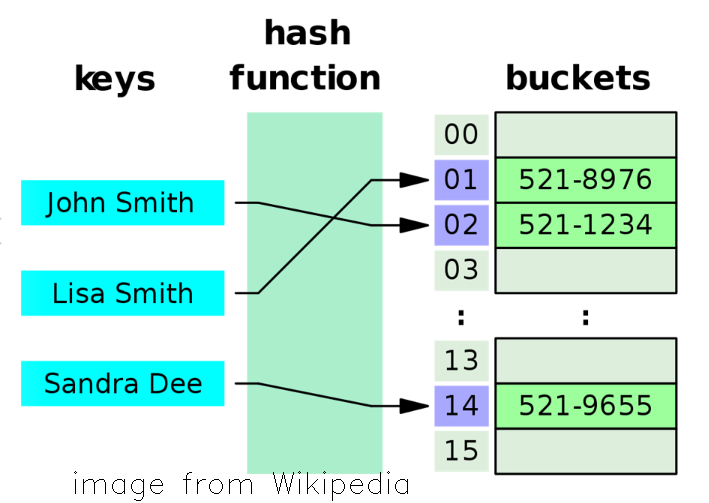

In [ ]:
hash_table = "/content/here/MyDrive/Data and Algorithms/ALGO05/Hash table.png"
show_img(hash_table, resize=0.75, source="image from Wikipedia", sourceScale=1)

These hash values (`7` and `1`) could be used in a sequential, small-integer index, i.e., a *hash table*.

- This is how we get that constant time complexity with our set data structure.


# 5.4 Collisions

Major problem with `simple_hash()` function
- Index can range at most up to 10 (if using a single digit as an index)
- Ergo, many input values will result in collisions. 

In [ ]:
simple_hash(47583)

3

In [ ]:
simple_hash(7866778853)

3

No matter how long the input value may be, the hash will always the be last digit because the `simple_hash()` indexes the input by modulo 10. 

## Problems

Major problem with the `simple_hash()` function:
* The hash table has at most ten indices 
* Ergo, many input values will result in **collisions**, e.g.:

## Solution
(excerpt)

Three common ways to resolve collisions:
1. Change the modulus denominator (e.g., `10` --> `11`); this adds procedural (and thus time) complexity to hash algo
2. Change the hash function entirely; ditto w.r.t. procedural complexity
3. Store a list (or similar) at the index, e.g.:

In [ ]:
hash_table = {}

In [ ]:
hash_table[simple_hash(555)] = [555]
hash_table

{5: [555]}

In [ ]:
hash_table[simple_hash(125)].append(125)
hash_table

{5: [555, 125]}

(Excerpt)

Such a list is called a **bucket**. 

Worst case:
* All of the values hash to the same hash value (e.g., `5`)
* Thus, all of the values are stored in a single bucket
* Searching through the bucket has linear O($n$) time complexity

Alternatively, we can increase memory complexity instead of time complexity: 
* Use very large modulus denominator
* Reduces probability of collisions
* If use denominator of `1e9`, we have a hash table with a billion buckets

Could also have a second hash function *inside* of the bucket (e.g., if we know we'll have a few very large buckets).

There is no "perfect hash". It depends on the values you're working with. There are many options to consider with various trade-offs.

#### Nested hash

In [ ]:
def outer_hash(value):
    return value % 1e9

In [ ]:
outer_hash(emergency_call)

991197184.0

In [ ]:
outer_hash(47862199645)

862199645.0

In [ ]:
nested_hash_table = {}

In [ ]:
nested_hash_table[outer_hash(emergency_call)] = [emergency_call]
nested_hash_table

{991197184.0: [1189998819991197253]}

In [ ]:
nested_hash_table[outer_hash(emergency_call)].append(5)
nested_hash_table[outer_hash(emergency_call)].append(12)
nested_hash_table[outer_hash(emergency_call)].append(752)

In [ ]:
nested_hash_table

{991197184.0: [1189998819991197253, 5, 5, 12, 752]}

In [ ]:
def inner_hash(value):
    return value % 10

In [ ]:
n = len(nested_hash_table[991197184.0])
nested_list = nested_hash_table[991197184.0]

for i in range(n):
    nested_list[i] = {inner_hash(nested_list[i]): nested_list[i]}

In [ ]:
nested_hash_table

{991197184.0: [{3: 1189998819991197253}, {5: 5}, {5: 5}, {2: 12}, {2: 752}]}